In [1]:
#import geopandas
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os, os.path
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from ipynb.fs.full.interp_data import interpolate_scenario_data

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
sns.set_style("ticks")

In [4]:
C1_c = "#649B1C"
C2_c = "#00B593"
C3_c = "#4E84D4"

Show renewable generation and gas generation

In [5]:
# load data
ar6_world = pd.read_csv("../../data/AR6_data/1668008174375-AR6_Scenarios_Database_R10_regions_v1.1.csv/AR6_Scenarios_Database_R10_regions_v1.1.csv")
ar6_scen = pd.read_excel("../../data/AR6_data/AR6_Scenarios_Database_World_v1.1/AR6_Scenarios_Database_metadata_indicators_v1.1.xlsx",sheet_name = "meta_Ch3vetted_withclimate")

In [11]:
crosswalk = pd.read_excel("../../data/MESSAGE/mapping_file_R10edit.xlsx",sheet_name="main")
AR6_list = crosswalk["AR6_R10"].unique()
crosswalk.head()

,Countries,R10,AR6_R10,GEM_Name,ISO
0,Algeria,Africa (R10),R10AFRICA,Algeria,DZA
1,Angola,Africa (R10),R10AFRICA,Angola,AGO
2,Benin,Africa (R10),R10AFRICA,NaN,BEN
3,Botswana,Africa (R10),R10AFRICA,NaN,BWA
4,Burkina Faso,Africa (R10),R10AFRICA,NaN,BFA


In [25]:
AR6_list

array(['R10AFRICA', 'R10CHINA+', 'R10EUROPE', 'R10INDIA+', 'R10LATIN_AM',
       'R10MIDDLE_EAST', 'R10NORTH_AM', 'R10PAC_OECD', 'R10REF_ECON',
       'R10REST_ASIA'], dtype=object)

In [6]:
ar6_scen_123 = ar6_scen[ar6_scen["Category"].isin(["C1","C2","C3"])]

In [7]:
# unit in EJ
# EJ/yr x 10^6 TJ/EJ x tCO2/TJ x 1MtCO2/10^6 tCO2
ar6_gas_gen = ar6_world.query("Variable=='Primary Energy|Gas|Electricity|w/o CCS'")#Capacity|Electricity|Coal|w/o CCS
ar6_gas_gen = interpolate_scenario_data(ar6_gas_gen)
ar6_gas_gen = pd.merge(ar6_gas_gen,ar6_scen_123[["Model","Scenario","Category"]],
                                  left_on=["Model","Scenario"],right_on=["Model","Scenario"])
ar6_world_gas_melt = pd.melt(ar6_gas_gen,id_vars=["Model","Scenario","Category","Region"],value_vars=ar6_gas_gen.columns[5:-1],
                             var_name="Year",value_name="GasGen_EJ/yr").dropna()
ar6_world_gas_melt["Year"] = ar6_world_gas_melt["Year"].astype(int)
ar6_world_gas_melt = ar6_world_gas_melt.sort_values("Category")
ar6_world_gas_melt

,Model,Scenario,Category,Region,Year,GasGen_EJ/yr
136766,IMAGE 3.2,SSP2_SPA1_19I_D_LB,C1,R10EUROPE,2039,0.306825
134524,MESSAGEix-GLOBIOM_1.1,EN_NPi2020_600_DR4p,C1,R10PAC_OECD,2038,0.128079
134525,MESSAGEix-GLOBIOM_1.1,EN_NPi2020_600_DR4p,C1,R10REF_ECON,2038,0.084572
134526,MESSAGEix-GLOBIOM_1.1,EN_NPi2020_600_DR4p,C1,R10REST_ASIA,2038,0.752214
158838,REMIND-MAgPIE 2.1-4.2,EN_NPi2020_500,C1,R10REST_ASIA,2048,0.144680
...,...,...,...,...,...,...
69939,IMAGE 3.0,CO_2Deg2020,C3,R10EUROPE,2065,0.130681
69938,IMAGE 3.0,CO_2Deg2020,C3,R10CHINA+,2065,1.843335
69937,GEM-E3_V2021,EN_NPi2020_800f,C3,R10ROWO,2065,0.697216
167475,REMIND-MAgPIE 2.1-4.2,EN_NPi2020_1200f,C3,R10ROWO,2052,0.189020


In [8]:
ar6_re_gen = ar6_world.query("Variable=='Primary Energy|Non-Biomass Renewables'")
ar6_re_gen = interpolate_scenario_data(ar6_re_gen)
ar6_re_gen = pd.merge(ar6_re_gen,ar6_scen_123[["Model","Scenario","Category"]],
                                  left_on=["Model","Scenario"],right_on=["Model","Scenario"])
ar6_re_gen_melt = pd.melt(ar6_re_gen,id_vars=["Model","Scenario","Category","Region"],value_vars=ar6_gas_gen.columns[5:-1],
                             var_name="Year",value_name="REGen_EJ/yr").dropna()
ar6_re_gen_melt["Year"] = ar6_re_gen_melt["Year"].astype(int)
ar6_re_gen_melt = ar6_re_gen_melt.sort_values("Category")
ar6_re_gen_melt

,Model,Scenario,Category,Region,Year,REGen_EJ/yr
199764,WITCH 5.0,EN_NPi2020_450f,C1,R10MIDDLE_EAST,2043,7.455761
250258,REMIND-MAgPIE 2.1-4.2,NGFS2_Divergent Net Zero Policies,C1,R10CHINA+,2059,33.650100
250259,REMIND-MAgPIE 2.1-4.2,NGFS2_Divergent Net Zero Policies,C1,R10EUROPE,2059,26.297340
250260,REMIND-MAgPIE 2.1-4.2,NGFS2_Divergent Net Zero Policies,C1,R10INDIA+,2059,35.450300
250261,REMIND-MAgPIE 2.1-4.2,NGFS2_Divergent Net Zero Policies,C1,R10LATIN_AM,2059,16.326660
...,...,...,...,...,...,...
228786,MESSAGEix-GLOBIOM_1.1,EN_NPi2020_1000f,C3,R10REST_ASIA,2053,15.410281
228787,MESSAGEix-GLOBIOM_1.1,EN_NPi2020_1000f_COV,C3,R10AFRICA,2053,10.459894
228788,MESSAGEix-GLOBIOM_1.1,EN_NPi2020_1000f_COV,C3,R10CHINA+,2053,36.446122
228777,MESSAGEix-GLOBIOM_1.1,EN_NPi2020_1000f,C3,R10AFRICA,2053,14.061871


### Plot

In [12]:
def plot_orig(plot_type,melted_data,melted_data_col,caption,name):
    """
    plot_type = "hist" # "hist" "2050"
    melted_data = ar6_world_gas_melt
    melted_data_col = "MtCO2/yr"
    caption = "Natural gas generation (EJ/year)"
    name = "gas"
    
    """
    fig, axes = plt.subplots(3,4,figsize=(14,10))
    row_list = [0,0,0,0,1,1,1,1,2,2,2]
    col_list = [0,1,2,3,0,1,2,3,0,1,3]

    for n_r10 in np.arange(len(AR6_list)+1):
        this_ax = axes[row_list[n_r10],col_list[n_r10]]
        if n_r10<10: # separate R10 regions
            r10 = AR6_list[n_r10]
            melted_data_r = melted_data[melted_data["Region"]==r10]
        else: # summarize data in the wolrd
            r10 = "R10WORLD"
            melted_data_r = melted_data.groupby(["Year","Model","Scenario","Category"]).sum()[[melted_data_col]]
            melted_data_r = melted_data_r.sort_values("Category")

        sns.lineplot(x='Year', y=melted_data_col, hue='Category', data=melted_data_r,palette=[C1_c,C2_c,C3_c],ax=this_ax)

        this_ax.set_xlabel(None)
        this_ax.set_title(r10[3:])
        if n_r10 == 9:
            this_ax.legend(title = 'Category', loc='center left', bbox_to_anchor=(1, 0.5),frameon=False)
        else:
            this_ax.get_legend().remove()

        if n_r10 == 4 :
            this_ax.set_ylabel(caption)
        else:
            this_ax.set_ylabel(None)

        if n_r10 == 10:
            this_ax.set_facecolor('whitesmoke')

        if plot_type == "hist":
            this_ax.set_xlim([2020,2100])
        elif plot_type == "2050":
            this_ax.set_xlim([2020,2050])

    fig.delaxes(axes[2,2])
    fig.savefig("committed_"+name+"_gen_"+plot_type+"_R10.png",dpi=600, bbox_inches='tight')

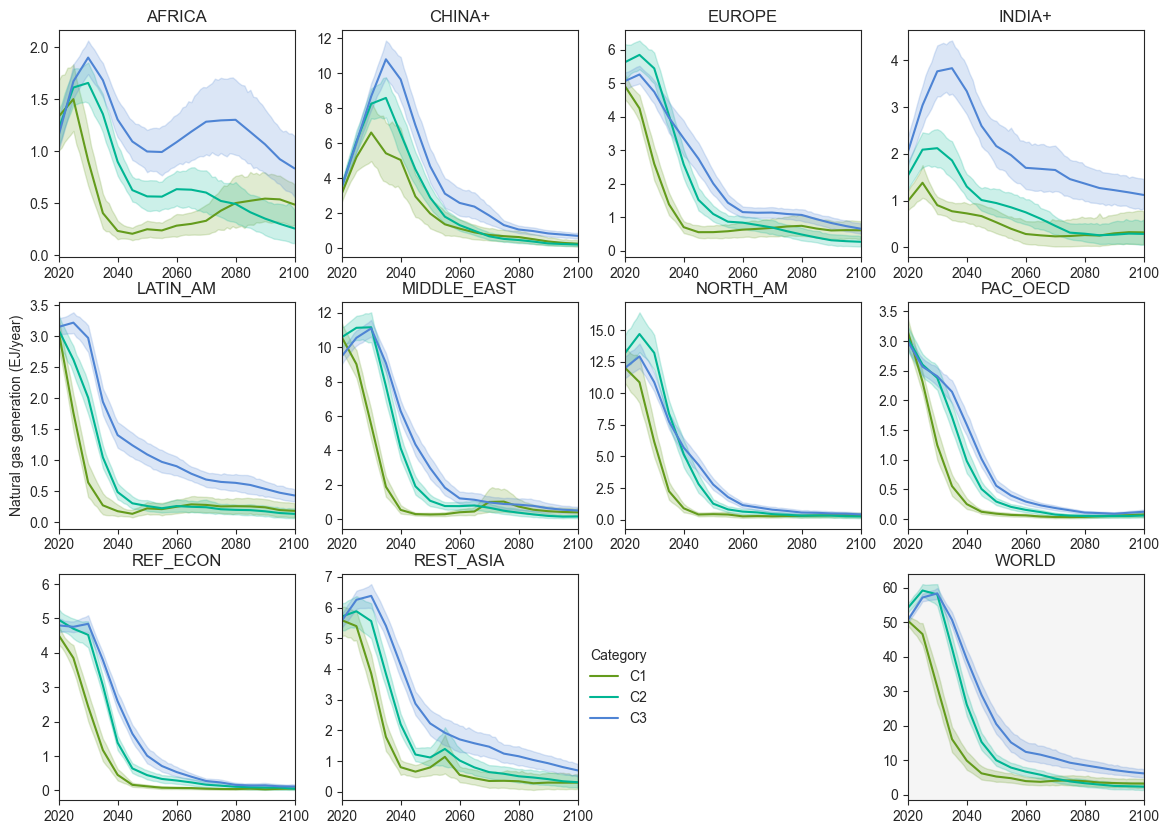

In [13]:
plot_orig("hist",ar6_world_gas_melt,"GasGen_EJ/yr","Natural gas generation (EJ/year)","gas")

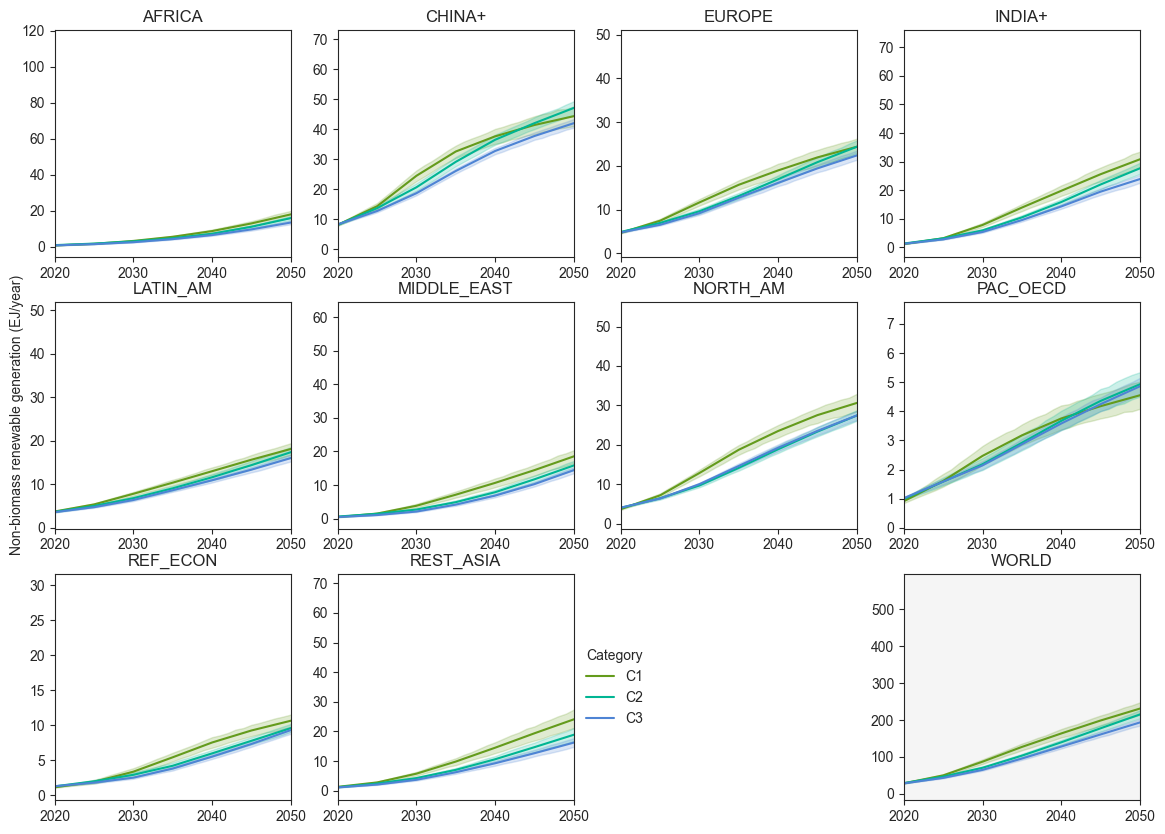

In [21]:
plot_orig("2050",ar6_re_gen_melt,"REGen_EJ/yr","Non-biomass renewable generation (EJ/year)","re")

In [19]:
merged_data = pd.merge(ar6_re_gen_melt,ar6_world_gas_melt,on=["Model","Scenario","Category","Region","Year"])
merged_data["GASvsRE"] = merged_data["GasGen_EJ/yr"]/merged_data["REGen_EJ/yr"]
merged_data

,Model,Scenario,Category,Region,Year,REGen_EJ/yr,GasGen_EJ/yr,GASvsRE
0,REMIND-MAgPIE 2.1-4.2,NGFS2_Divergent Net Zero Policies,C1,R10CHINA+,2059,33.650100,4.572720,0.135890
1,REMIND-MAgPIE 2.1-4.2,NGFS2_Divergent Net Zero Policies,C1,R10EUROPE,2059,26.297340,1.592280,0.060549
2,REMIND-MAgPIE 2.1-4.2,NGFS2_Divergent Net Zero Policies,C1,R10INDIA+,2059,35.450300,0.472980,0.013342
3,REMIND-MAgPIE 2.1-4.2,NGFS2_Divergent Net Zero Policies,C1,R10LATIN_AM,2059,16.326660,0.000240,0.000015
4,REMIND-MAgPIE 2.1-4.2,NGFS2_Divergent Net Zero Policies,C1,R10MIDDLE_EAST,2059,18.860060,1.131200,0.059979
...,...,...,...,...,...,...,...,...
250097,MESSAGEix-GLOBIOM_1.1,EN_NPi2020_1000f,C3,R10REST_ASIA,2053,15.410281,1.792135,0.116295
250098,MESSAGEix-GLOBIOM_1.1,EN_NPi2020_1000f_COV,C3,R10AFRICA,2053,10.459894,1.653389,0.158069
250099,MESSAGEix-GLOBIOM_1.1,EN_NPi2020_1000f_COV,C3,R10CHINA+,2053,36.446122,3.873931,0.106292
250100,MESSAGEix-GLOBIOM_1.1,EN_NPi2020_1000f,C3,R10AFRICA,2053,14.061871,1.038523,0.073854


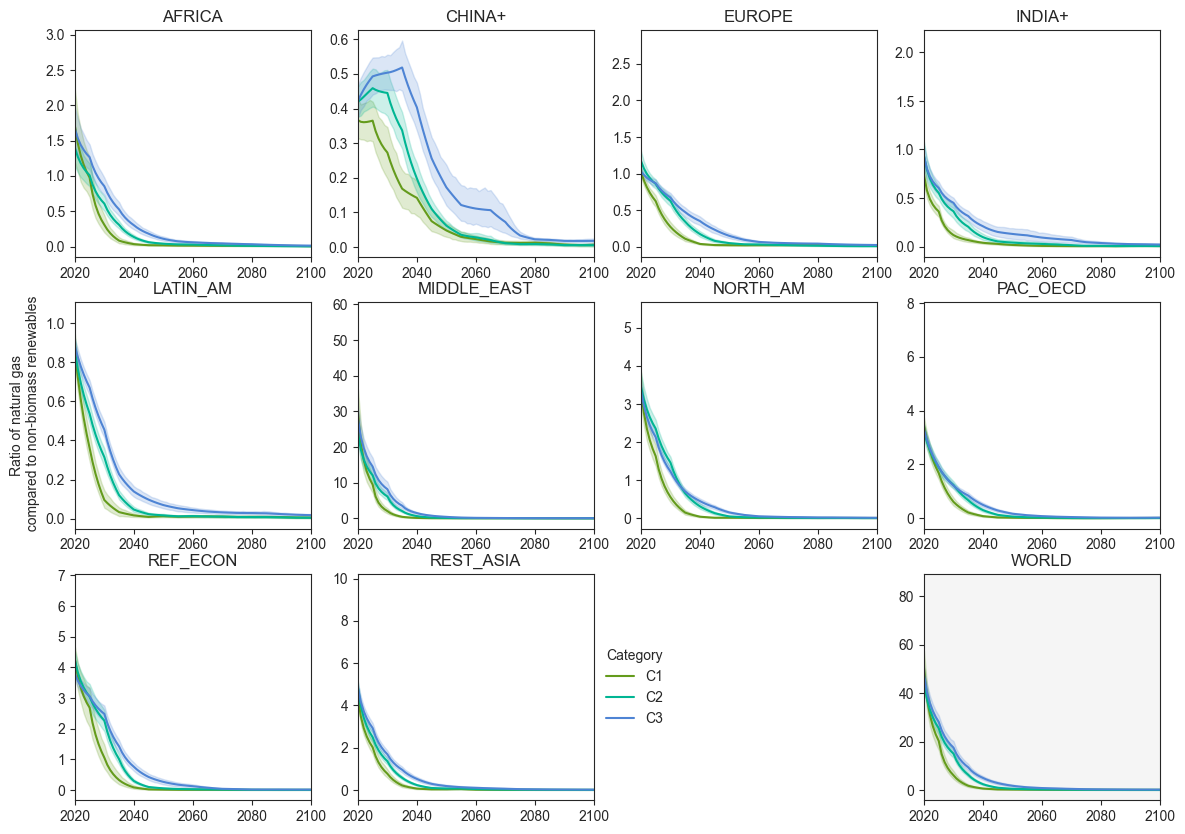

In [20]:
plot_orig("hist",merged_data,"GASvsRE","Ratio of natural gas\n compared to non-biomass renewables","GASvRE")